In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from utils import find_bh

In [2]:
plt.rcParams.update({'font.size': 30})

In [3]:
npcs=[5,10,15,20]
neigh=[5,10,15,20]
letters=["e-strategy","MAGIC","ENHANCE","SAVER"]
titles=["GSE110949","E-GEOD-86618","GSE118056"]

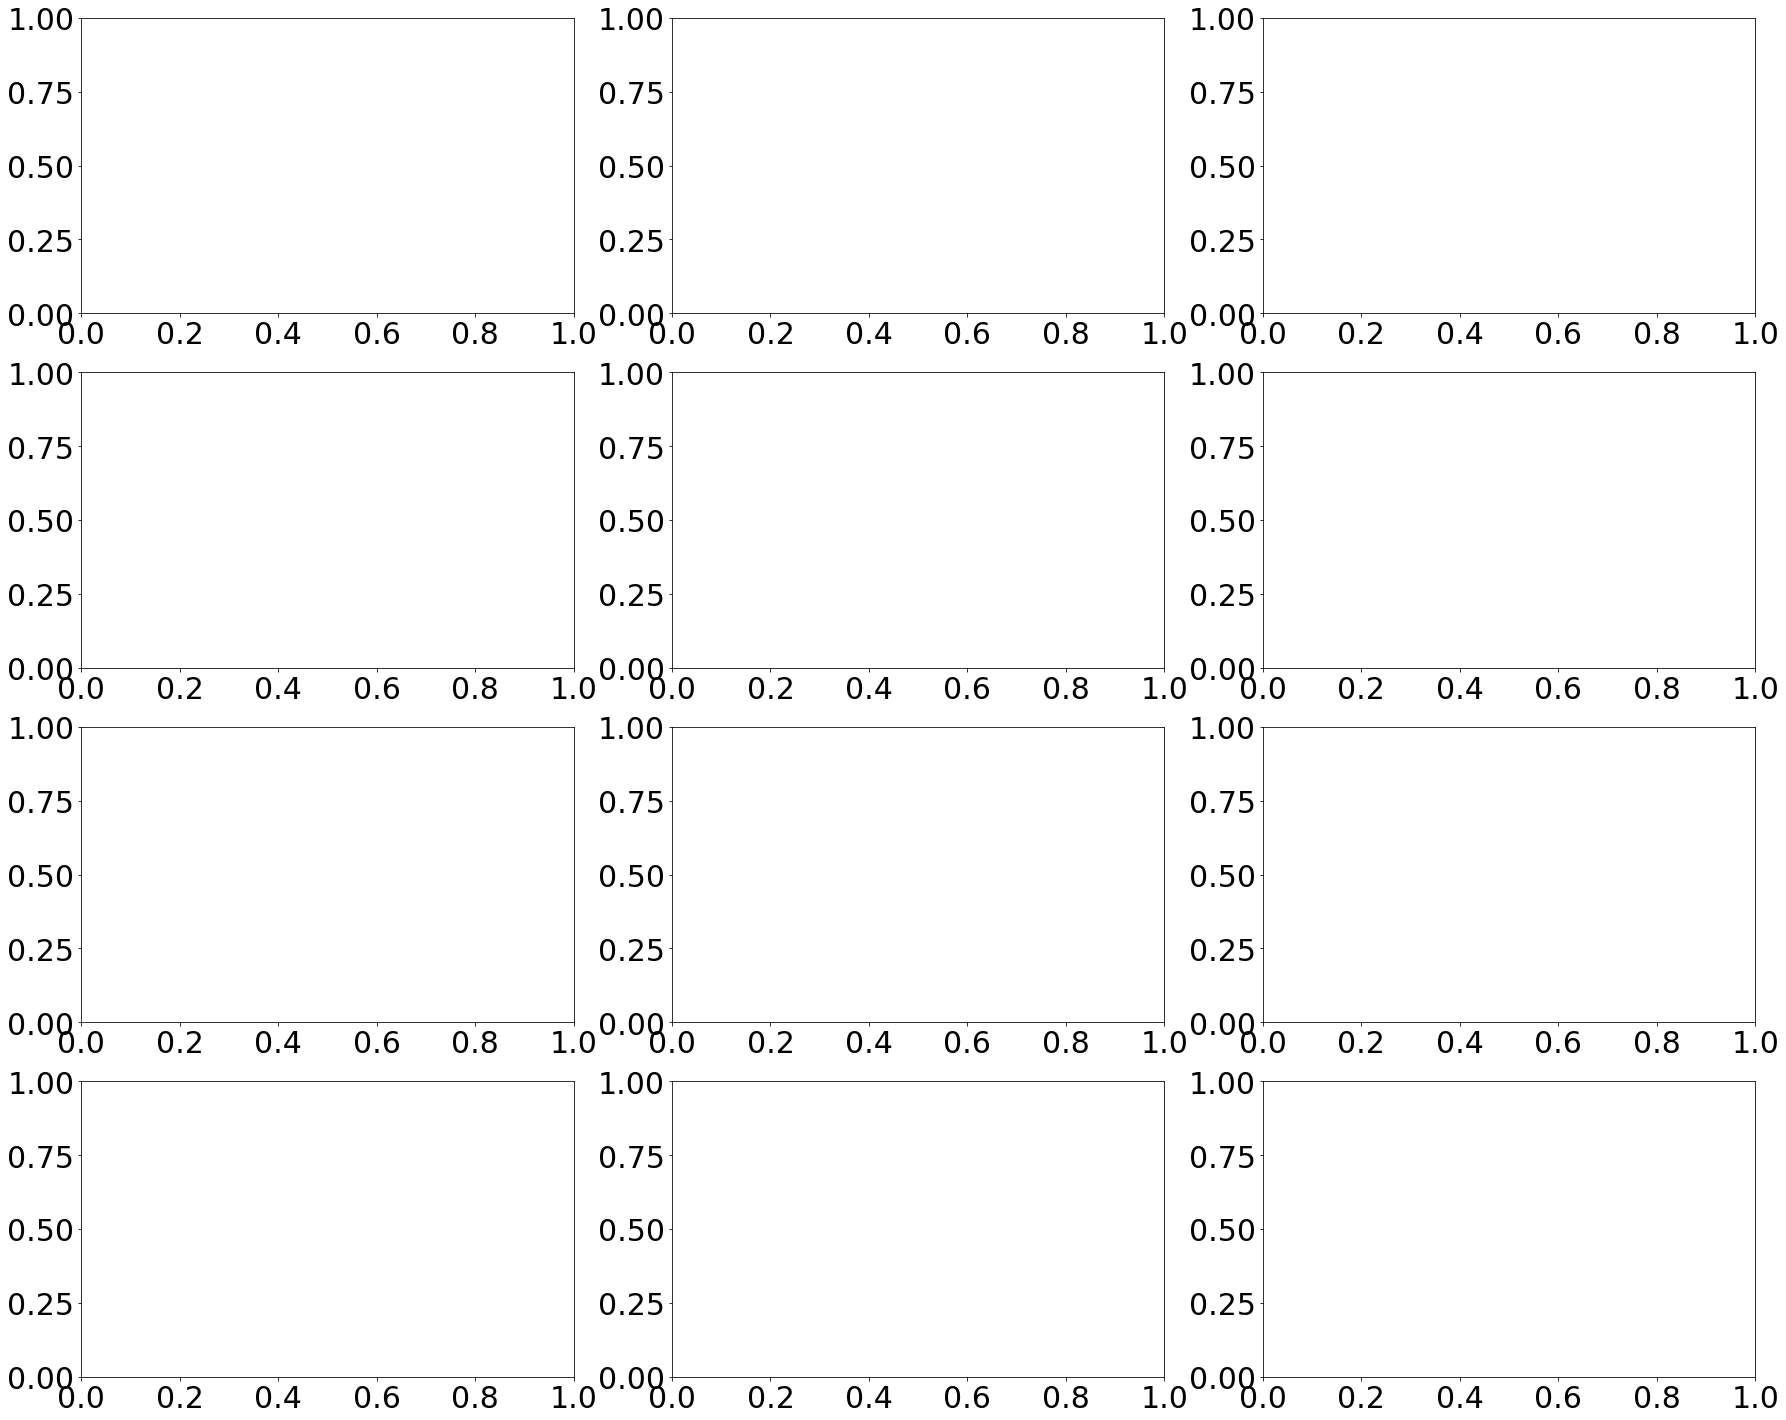

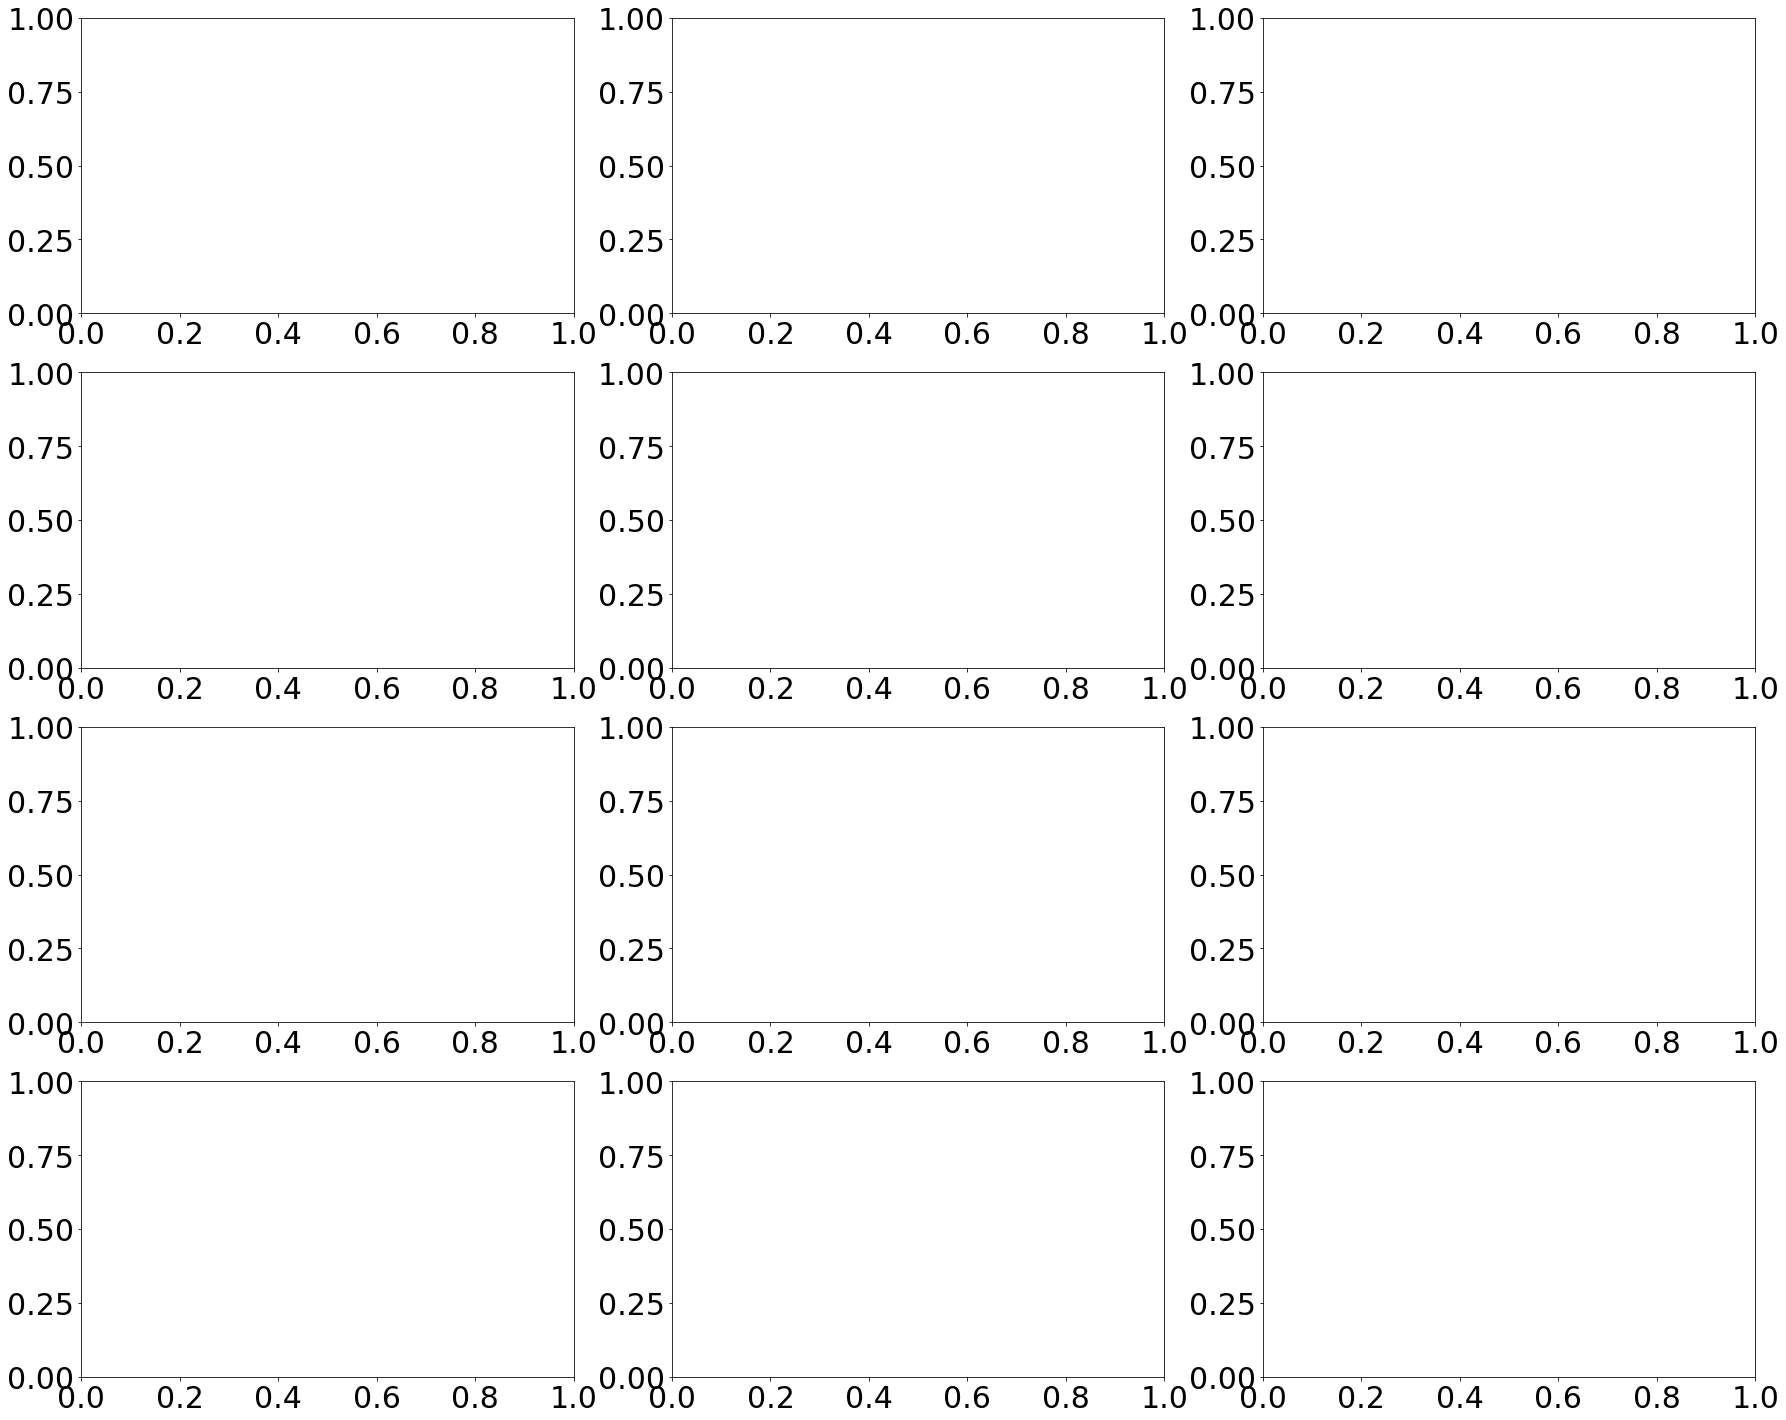

In [4]:
fig_prior,axes_prior=plt.subplots(4,3,figsize= (30,25))
axes_prior=axes_prior.ravel()

fig_cellcyle,axes_cellcycle=plt.subplots(4,3,figsize= (30,25))
axes_cellcycle=axes_cellcycle.ravel()

In [5]:
## Flux Cluster Analysis
j=0
k=0
for strategy in ["epsilon","magic_counts","enhance_counts","saver_counts"]:
    k=0
    for file_input in ["datasetGSE110949","datasetE-GEOD-86618","datasetGSE118056"]:
        
        if file_input=="datasetE-GEOD-86618":
            filter_biomass=False
        else:
            filter_biomass=True
            
        flux_adata=sc.read_h5ad("outputs/fluxes/"+file_input+"_"+strategy)
        
        if strategy=="saver_counts":
            flux_adata_help=sc.read_h5ad("outputs/fluxes/"+file_input+"_epsilon")
            flux_adata.obs=flux_adata_help.obs.copy()

        dfPhase=pd.read_csv("outputs/cell_cycle_information/"+file_input+"cell_cycle_phases.csv",index_col=0)
        flux_adata.obs["phase"]=dfPhase["phase"]


        if filter_biomass:
            index=flux_adata.to_df().loc[flux_adata.to_df()["Biomass"]>0].index
            flux_adata=flux_adata[index,:]
        flux_adata


        #sc.pp.filter_genes(flux_adata,min_cells=1)
        sc.pp.scale(flux_adata)
        sc.tl.pca(flux_adata, svd_solver='arpack')

        df=find_bh(flux_adata,n_pcs=npcs,n_neighbors=neigh)
        el=df["cluster_values_sil"].argmax()
        n_pcs=int(df.iloc[el]["pcs_values"])
        neigh_values=int(df.iloc[el]["neigh_values"])


        sc.pp.neighbors(flux_adata, n_neighbors=neigh_values ,n_pcs=n_pcs)
        sc.tl.umap(flux_adata,random_state=0)#,init_pos="paga")#,n_components=3)
        if file_input=="datasetE-GEOD-86618":
            values=flux_adata.obs['countmatrix_Factor Value[disease]'].values
            values=[el if el=="normal" else "IFP" for el in values ]
            flux_adata.obs['countmatrix_Factor Value[disease]']=values
            sc.pl.umap(flux_adata,color=['countmatrix_Factor Value[disease]'],title="",return_fig=False,ax=axes_prior[j*3+k])
        else:
            sc.pl.umap(flux_adata, color=['countmatrix_Type'],title="",return_fig=False,ax=axes_prior[j*3+k])

        sc.pl.umap(flux_adata, color=['phase'],title="",return_fig=False,ax=axes_cellcycle[j*3+k])
        k=k+1
    j=j+1

C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
faile

In [6]:
axes_prior[0].annotate(letters[0], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)
axes_prior[3].annotate(letters[1], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)
axes_prior[6].annotate(letters[2], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)
axes_prior[9].annotate(letters[3], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)




Text(-0.7, 0.5, 'SAVER')

In [7]:
axes_prior[0].set_title(titles[0],fontsize=30)
axes_prior[1].set_title(titles[1],fontsize=30)
axes_prior[2].set_title(titles[2],fontsize=30)

Text(0.5, 1.0, 'GSE118056')

In [8]:
axes_cellcycle[0].annotate(letters[0], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)
axes_cellcycle[3].annotate(letters[1], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)
axes_cellcycle[6].annotate(letters[2], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)
axes_cellcycle[9].annotate(letters[3], xy=(-0.7, 0.5), xycoords="axes fraction",fontsize=30)



Text(-0.7, 0.5, 'SAVER')

In [9]:
axes_cellcycle[0].set_title(titles[0],fontsize=30)
axes_cellcycle[1].set_title(titles[1],fontsize=30)
axes_cellcycle[2].set_title(titles[2],fontsize=30)

Text(0.5, 1.0, 'GSE118056')

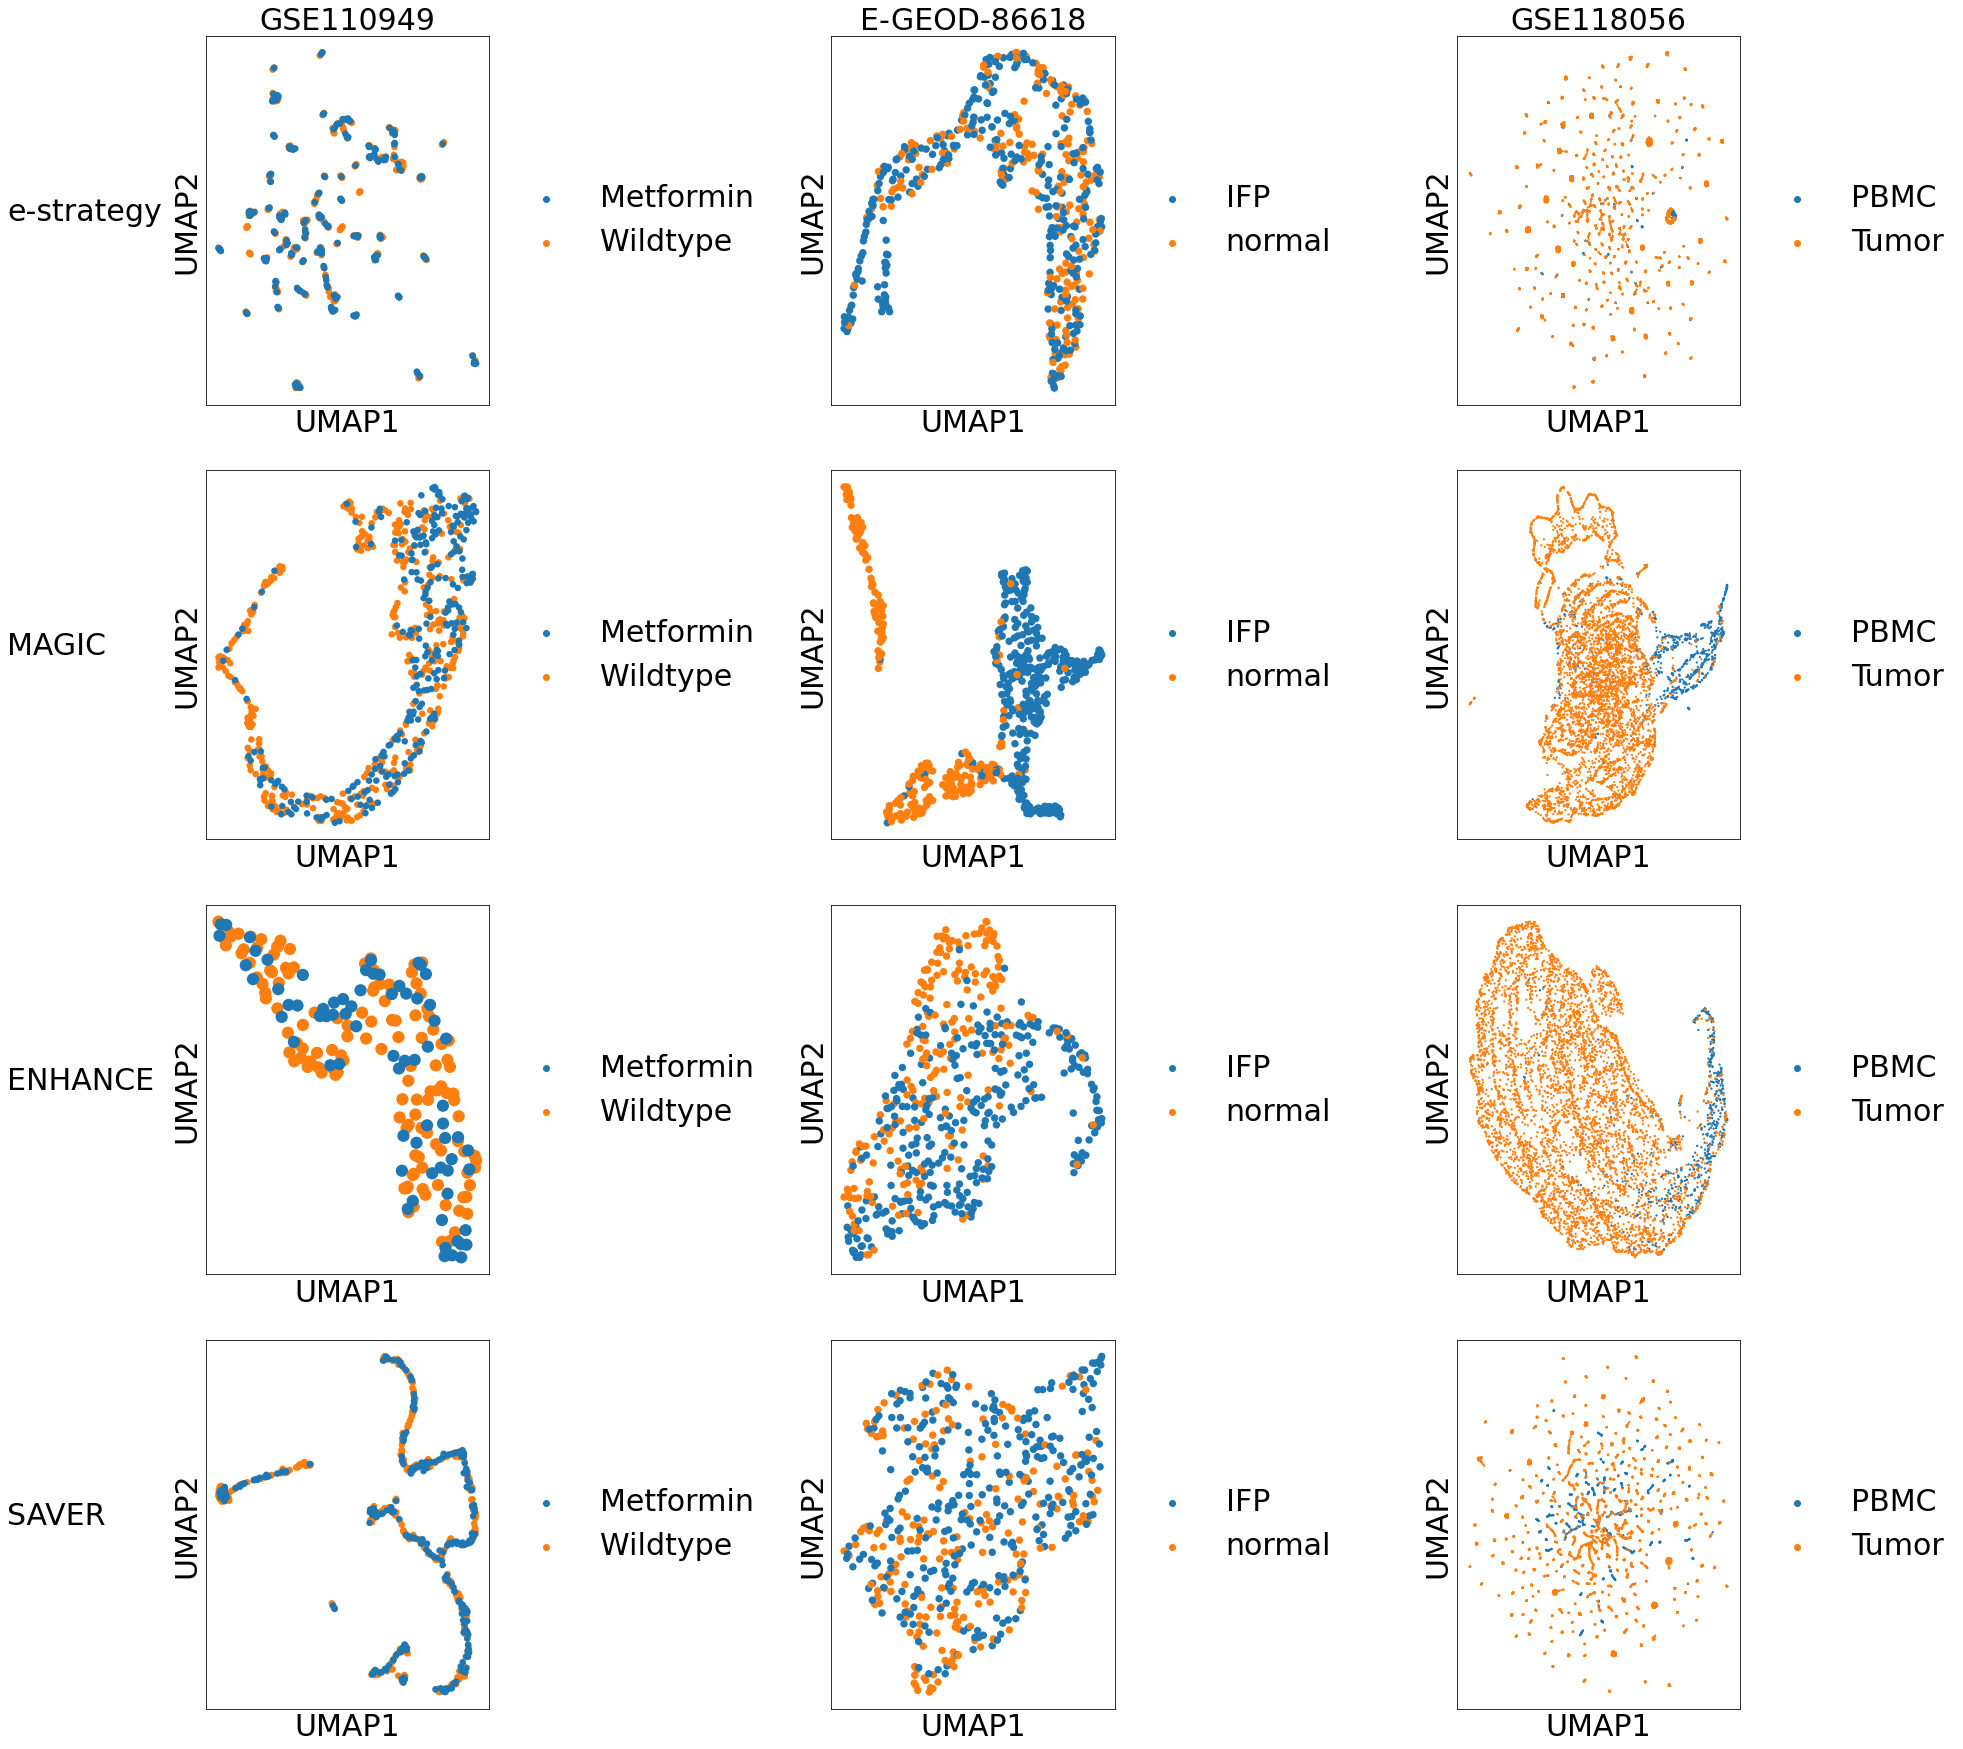

In [10]:
fig_prior.tight_layout()
plt.show()
fig_prior

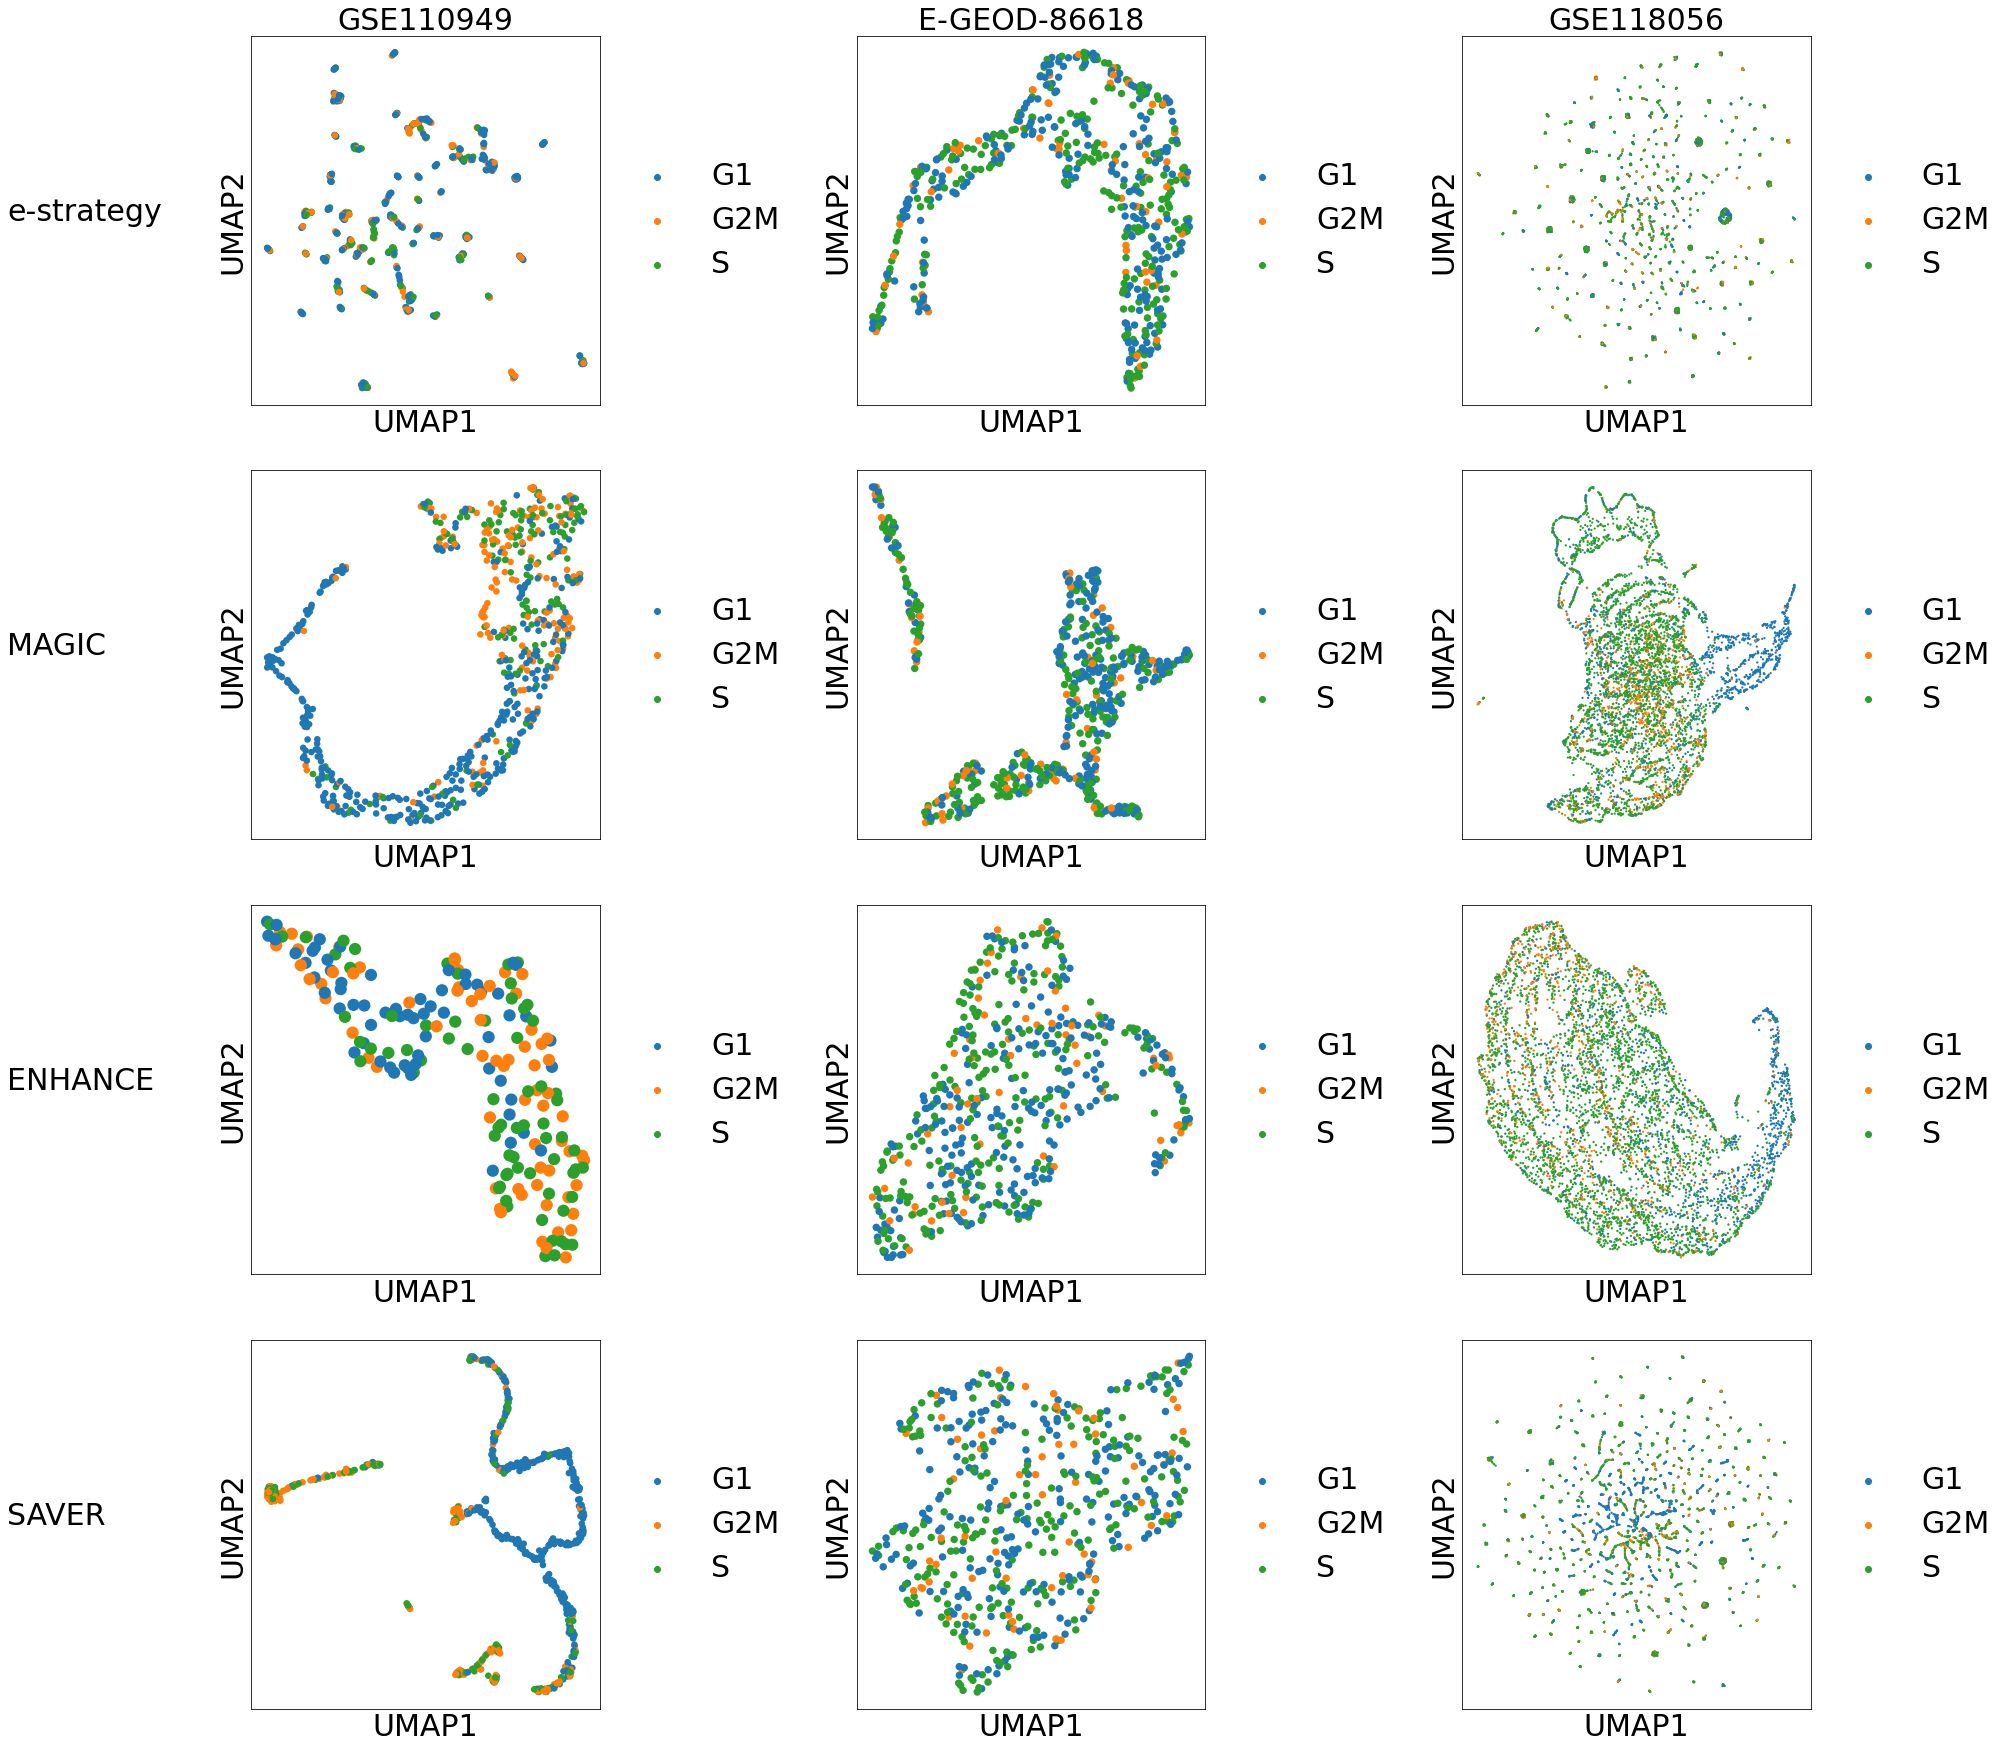

In [11]:
fig_cellcyle.tight_layout()
plt.show()
fig_cellcyle

In [12]:
fig_prior.savefig("images/flux_prior.png",dpi=300)
fig_cellcyle.savefig("images/flux_cellcycle.png",dpi=300)

In [13]:
fig_prior.savefig("images/flux_prior.png",dpi=300)
fig_cellcyle.savefig("images/flux_cellcycle.png",dpi=300)